In [1]:
from pyspark.sql import SparkSession, functions as F
from pyspark.sql.functions import *

# Cell to create a spark session
spark = (
    SparkSession.builder.appName("MAST30034 ASSIGNMENT 1 DUSTIN")
    .config("spark.sql.repl.eagerEval.enabled", True) 
    .config("spark.sql.parquet.cacheMetadata", "true")
    .config("spark.sql.session.timeZone", "Etc/UTC")
    .config("spark.executor.memory", "2g")
    .config("spark.driver.memory", "4g")
    .getOrCreate()
)

22/08/19 15:13:25 WARN Utils: Your hostname, DESKTOP-3ADPNV0 resolves to a loopback address: 127.0.1.1; using 172.29.53.33 instead (on interface eth0)
22/08/19 15:13:26 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/08/19 15:13:28 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
22/08/19 15:13:30 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
22/08/19 15:13:30 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.


In [2]:
#cell for all imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols, glm


In [3]:
# cell to load the aggregated data

aggregate_date = pd.read_parquet('../../mast30034-project-1-dustintano10/data/curated/yellow/aggregate_date')
aggregate_weekday = pd.read_parquet('../../mast30034-project-1-dustintano10/data/curated/yellow/aggregate_weekday')
aggregate_weekend = pd.read_parquet('../../mast30034-project-1-dustintano10/data/curated/yellow/aggregate_weekend')
aggregate_win = pd.read_parquet('../../mast30034-project-1-dustintano10/data/curated/yellow/aggregate_win')
aggregate_lose = pd.read_parquet('../../mast30034-project-1-dustintano10/data/curated/yellow/aggregate_lose')
aggregate_start = pd.read_parquet('../../mast30034-project-1-dustintano10/data/curated/yellow/aggregate_start')
aggregate_PU = pd.read_parquet('../../mast30034-project-1-dustintano10/data/curated/yellow/aggregate_PU')
aggregate_DO = pd.read_parquet('../../mast30034-project-1-dustintano10/data/curated/yellow/aggregate_DO')

In [15]:
aggregate_date.rename(columns = {'mean_tip':'average tip', 'mean_distance':'average distance', 'mean_fare' : 'average fare',
                           'mean_total' : 'average total cost', 'mean_length' : 'average trip time', 
                            'mean_margin' : 'average score margin', 'mean_attendance' : 'average attendance' }, inplace = True )
aggregate_date

,date,average tip,average distance,average fare,average total cost,average trip time,average score margin,average attendance
0,2018-10-17,2.1856,1.9649,10.5971,14.0219,13.1581,19.0,18249.0
1,2018-10-20,2.0830,2.0786,10.4644,13.5894,12.4323,-2.0,19427.0
2,2018-10-26,2.1301,1.9315,10.4513,13.8198,12.9489,-28.0,19812.0
3,2018-10-29,2.1076,2.0071,10.1668,13.5296,11.9771,19.0,19221.0
4,2018-10-31,2.0861,1.9333,10.2098,13.5241,12.3031,-6.0,18295.0
5,2018-11-05,2.1121,1.9291,10.2613,13.6225,12.5890,-1.0,19812.0
6,2018-11-11,2.0881,2.1319,10.4366,13.5995,12.0614,-26.0,19812.0
7,2018-11-20,2.1076,1.8736,10.2946,13.6276,12.8690,-4.0,19812.0
8,2018-11-23,1.9953,1.9833,9.5126,12.7763,10.3960,5.0,18948.0
9,2018-12-01,2.0671,1.9830,10.3111,13.4179,12.4687,2.0,19812.0


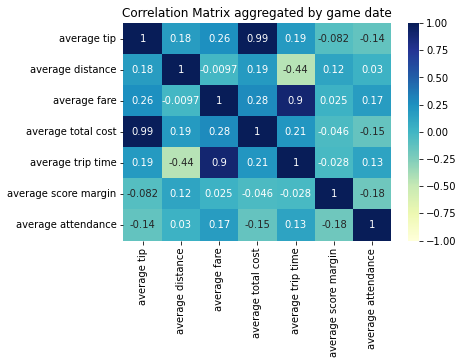

<Figure size 648x720 with 0 Axes>

In [30]:
correlation_matrix = sns.heatmap(aggregate_date.corr(), cmap="YlGnBu", annot=True, vmin= -1, vmax=1)



plt.title('Correlation Matrix aggregated by game date')
plt.figure(figsize = (9,10))
plt.savefig('../../mast30034-project-1-dustintano10/plots/correlation_matrix.png', dpi=4)
plt.show()

In [31]:
figure_correlation = correlation_matrix.get_figure()
figure_correlation.savefig('../../mast30034-project-1-dustintano10/plots/correlation_matrix.png', dpi=400)